# Desafio Random Forest

## 1. Preparación del ambiente de trabajo

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor

import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error , r2_score

import warnings


warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(15, 12)
plt.rcParams["axes.labelsize"] = 14

In [15]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

## 2. Importación de archivos serializados

In [16]:
dec_tree_grid_cv = pickle.load(open('Desaf_Arboles_decision_model2.sav','rb'))
X_train2 = pickle.load(open('Desaf_Arboles_decision_x_train2.sav','rb'))
X_test2 = pickle.load(open('Desaf_Arboles_decision_x_test2.sav','rb'))
y_train2 = pickle.load(open('Desaf_Arboles_decision_y_train2.sav','rb'))
y_test2 = pickle.load(open('Desaf_Arboles_decision_y_test2.sav','rb'))

In [17]:
%%time
print("Test MSE:", mean_squared_error(y_test2,dec_tree_grid_cv.predict(X_test2)).round(5))
print("Test MAE:", median_absolute_error(y_test2,dec_tree_grid_cv.predict(X_test2)).round(5))
print("Test R2:", r2_score(y_test2, dec_tree_grid_cv.predict(X_test2)).round(5))

Test MSE: 2676597727.13424
Test MAE: 22100.0
Test R2: 0.57444
Wall time: 9.07 ms


## 3. Evaluación Random Forest

In [ ]:
X_mat = df.iloc[:,1:]
y_vec = df['diagnosis']

In [6]:
m_rf = RandomForestRegressor().fit(X_train2,y_train2)

In [7]:
y_hat_rf = m_rf.predict(X_test2)

In [8]:
print("Test MSE:", mean_squared_error(y_test2,m_rf.predict(X_test2)).round(5))
print("Test MAE:", median_absolute_error(y_test2,m_rf.predict(X_test2)).round(5))
print("Test R2:", r2_score(y_test2, m_rf.predict(X_test2)).round(5))

Test MSE: 724641475.75962
Test MAE: 11088.86
Test R2: 0.88479


El desempeño del modelo Random Forest, es mejor que el del modelo entrenado con Decision Tree Regressor. Las funciones de pérdida caen y el R2, indica que un 88% del vector objetivo se expliquen con los datos.

## 4. Reporte las métricas de desempeño

In [9]:

tmp_oob_none, tmp_oob_sqrt,tmp_oob_log2 = [], [], []
tmp_test_acc_none, tmp_test_acc_sqrt, tmp_test_acc_log = [], [], []

n_estimators = range(20, 1000, 25)

In [10]:
%%time
for i in n_estimators:

    voting_rf_none = RandomForestRegressor(n_estimators= i,max_features=None,
    oob_score=True,
    random_state=123).fit(X_train2, y_train2)

    voting_rf_sqrt = RandomForestRegressor(n_estimators= i,
    max_features="sqrt",
    warm_start=True,
    oob_score=True,
    random_state=123).fit(X_train2, y_train2)

    voting_rf_log = RandomForestRegressor(n_estimators= i,
    max_features="log2",
    warm_start=True,
    oob_score=True,
    random_state=123).fit(X_train2, y_train2)

    tmp_oob_none.append(voting_rf_none.oob_score_)
    tmp_oob_sqrt.append(voting_rf_sqrt.oob_score_)
    tmp_oob_log2.append(voting_rf_log.oob_score_)
    
    tmp_test_acc_none.append(r2_score(y_test2,voting_rf_none.predict(X_test2)))
    tmp_test_acc_sqrt.append(r2_score(y_test2,voting_rf_sqrt.predict(X_test2)))
    tmp_test_acc_log.append(r2_score(y_test2,voting_rf_log.predict(X_test2)))

Wall time: 7min 32s


<Figure size 864x288 with 0 Axes>

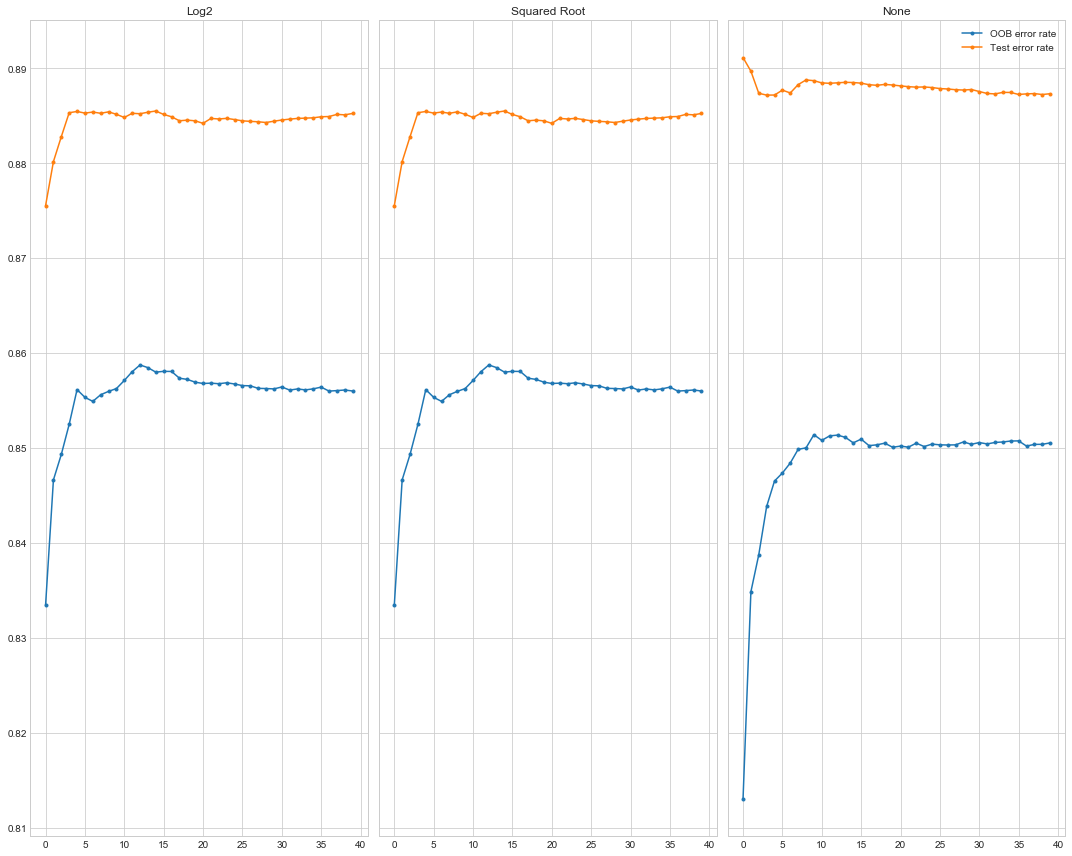

In [11]:
plt.figure(figsize=(12, 4));
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True);
axs[0].plot(tmp_oob_log2, '.-', label='OOB error rate');
axs[0].plot(tmp_test_acc_log, '.-', label='Test error rate');
axs[0].set_title('Log2');
axs[1].plot(tmp_oob_sqrt,'.-', label='OOB error rate');
axs[1].plot(tmp_test_acc_sqrt,'.-', label='Test error rate');
axs[1].set_title('Squared Root');
axs[2].plot(tmp_oob_none, '.-', label='OOB error rate');
axs[2].plot(tmp_test_acc_none,'.-', label='Test error rate');
axs[2].set_title('None');
plt.tight_layout();
plt.legend();

## Problema 5

In [13]:
hyper_params = {'max_features': ['log2', 'sqrt',None],'n_estimators': range(20,1000, 50)}
model_rf_cv = GridSearchCV(RandomForestRegressor(random_state = 1028, oob_score = True),param_grid = hyper_params,n_jobs = -1,).fit(X_train2, y_train2)

In [18]:
print("Test MSE:", mean_squared_error(y_test2,m_rf.predict(X_test2)).round(5))
print("Test MAE:", median_absolute_error(y_test2,m_rf.predict(X_test2)).round(5))
print("Test R2:", r2_score(y_test2, m_rf.predict(X_test2)).round(5))

Test MSE: 724641475.75962
Test MAE: 11088.86
Test R2: 0.88479


In [19]:
print('Model Random Forest CV')
print("Test MSE:", mean_squared_error(y_test2,model_rf_cv.predict(X_test2)).round(5))
print("Test MAE:", median_absolute_error(y_test2,model_rf_cv.predict(X_test2)).round(5))
print("Test R2:", r2_score(y_test2, model_rf_cv.predict(X_test2)).round(5))

Model Random Forest CV
Test MSE: 730318209.23251
Test MAE: 10863.54324
Test R2: 0.88389


En cuanto a los resultados, se puede apreciar, que el modelo de Random Forest con búsqueda de hiperparámetros, representó una mejora sustancias en las métricas. El modelo de RF con parmetrós por defecto, fue levemente superior en cuanto al R2. Ambos modelos pueden explicar el 88% de variabilidad del vector y.

Solo el valor del MAE, es levemente más favorable para el modelo de RF con gridsearch. Para este caso, el desemepeño de ambos modelos es casi idéntico.